# Проектная работа по теме: Принятие решений в бизнесе

# Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Описание данных

**Данные для первой части**

Файл:`/datasets/hypothesis.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/hypothesis.csv);
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

**Данные для второй части**

Файл: `/datasets/orders.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders.csv);
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл: `/datasets/visitors.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visitors.csv);
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

# План работы
# Часть 1. Приоритизация гипотез.
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**
- Применить фреймворк `ICE` для приоритизации гипотез. Отсортировать по убыванию приоритета.
- Примените фреймворк `RICE` для приоритизации гипотез. Отсортировать по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объяснить, почему так произошло.

# Часть 2. Анализ A/B-теста
Результаты проведенного A/B-теста, описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

**Задача**
Проанализируйте A/B-тест:
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

# Приоритизация гипотез.
### Применим фреймворк ICE для приоритизации гипотез

In [1]:
#загружаем необходимые библиотеки
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# файл с данными записываем в переменную hypothesis
try:
    hypothesis=pd.read_csv('/datasets/hypothesis.csv',sep=',')
except:
    hypothesis=pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
#переименовываем колонки согласно "змеинному регистру"
hypothesis.columns = [x.lower() for x in hypothesis.columns]
pd.set_option('display.max_colwidth',None)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Данных немного дополнительная предобработка не требуется
### Применим фреймворк ICE для приоритизации гипотез

In [3]:
hypothesis['ICE']=hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
round(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False),1)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


### Применим фреймворк RICE для приоритизации гипотез

In [4]:
hypothesis['RICE']=(
    hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По фреймворку ICE наибольшую оценку имеет гипотеза 8 'Запустить акцию, дающую скидку на товар в день рождения'. 
После применения фреймворка RICE вперед вырвалась гипотеза  7 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'. Эта смена приоритетов обоснована тем что во фреймворке RICE учитывается охват аудитории этой гипотезы. В случае с 8й гипотезой охват самый незначительный, гипотеза 7 помимо самого широкого охвата(reach) имеет не самое ввысокое значение усилий(efforts) для ее внедрения, и довольно высокие показатели влияния на пользователей(impact) и уверенности(confidence)

Гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' рекомендуется ко внедрению

# Анализ A/B-теста

In [5]:
# файл с данными записываем в переменную orders
try:
    orders=pd.read_csv('/datasets/orders.csv',sep=',')
    visitors=pd.read_csv('/datasets/visitors.csv',sep=',')
except:
    orders=pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors=pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    
orders=orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id'})#переименовываем колонки согласно "змеинному регистру"
orders['date'] = orders['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))# меняем формат даты на datetime64[ns]
display('Наличие явных дубликатов в orders',orders.duplicated().sum())
display(orders.head())
display(orders.info())
# файл с данными записываем в переменную orders

visitors['date'] = visitors['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
display('Наличие явных дубликатов в visitors',visitors.duplicated().sum())
display(visitors.head())
display(visitors.info())

'Наличие явных дубликатов в orders'

0

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

'Наличие явных дубликатов в visitors'

0

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

Данные не имеют явных дубликатов,и пропусков, привели названия колонок к змеиному регистру. Был изменен формат даты для дальнейших расчетов, можем переходить к анализу.

### A/A исследование
Проверим количество пользователей в различных группах для успешного теста оно должно различается не более, чем на 1%;
Так же следует проверить что попавший в одну из групп посетитель остаётся в этой группе до конца теста.

In [6]:
print('Кол-во посетителей в группе А: {}\n'
      'Кол-во посетителей в группе B: {}\n'
      'Группы различаются на {:.1%}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                        visitors[visitors['group']=='B']['visitors'].sum(),
                                        visitors[visitors['group']=='B']['visitors'].sum()/ 
                                        visitors[visitors['group']=='A']['visitors'].sum()-1,))
#Найдем пользователей которых включили в обе группы
filt=(orders[orders['group']=='A']['visitor_id'].isin(orders[orders['group']=='B']['visitor_id'])*orders['visitor_id']).dropna()
filt=filt[filt!=0]
print("Посетителей входящих в обе группы:",len(filt.unique()))


Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Группы различаются на 1.0%
Посетителей входящих в обе группы: 58


Различие между группами составляет 1% это не должно повлиять на результаты A/B тестирования
По результатам тестирования обнаружено 58 аномальных пользователя, инструмент «деления» трафика работает ошибочно.

### Построим график кумулятивной выручки по группам

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845
..        ...   ...     ...     ...      ...       ...
57 2019-08-29     B     596     544  5559398     17708
58 2019-08-30     A     545     493  4022970     18037
59 2019-08-30     B     620     567  5774631     18198
60 2019-08-31     A     557     503  4084803     18736
61 2019-08-31     B     640     586  5907760     18916

[62 rows x 6 columns]


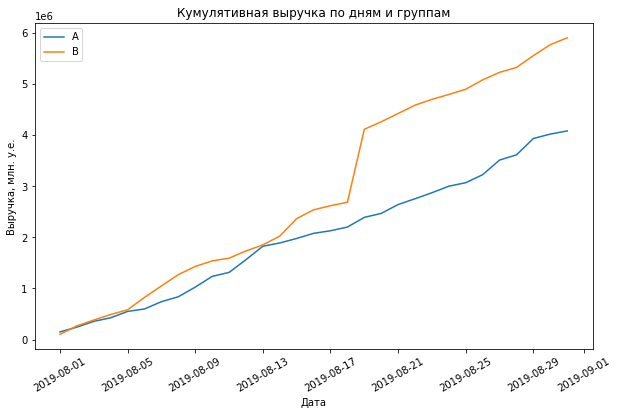

In [7]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(69))
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Строим график выручки группы А
plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks( rotation=30)
plt.xlabel('Дата')
plt.ylabel('Выручка, млн. у.е.') 
plt.title('Кумулятивная выручка по дням и группам')
plt.legend();

Группа B по куммулятивной выручке лидирирует на протяжении всего периода, на 18й день наблюдается резкий рост выручки у группы B, это может быть связанно с большим колличеством заказов, или аномально дорогим заказом в этот день 

### Построим график кумулятивного среднего чека по группам
Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

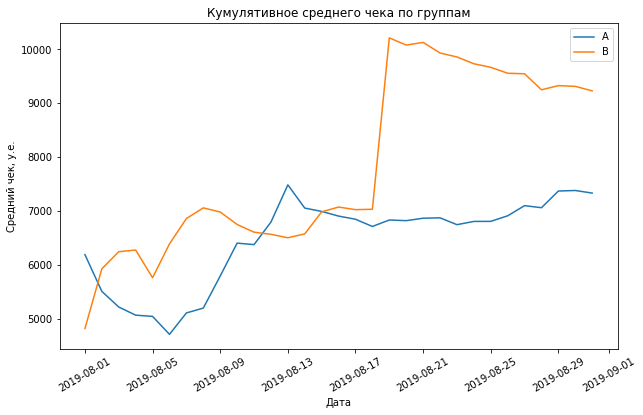

In [8]:
plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Средний чек, у.е.') 
plt.title('Кумулятивное среднего чека по группам')
plt.legend();

Как мы видим, средний чек так же как и выручка, в группе B почти всё время был выше,
смущает его резкий рост на 18й день, есть вероятность что он обусловлен найденными аномалиями, либо  в данную группу в середине теста попали крупные заказы. Необходимо будет учесть этот факт при принятии решения о результатах A/B-теста
Накопление среднего чека в обеих группах неравномерное.чтобы график среднего чека установился на определенном уровне необходимо продлить тест или задействовать больше данных.


### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

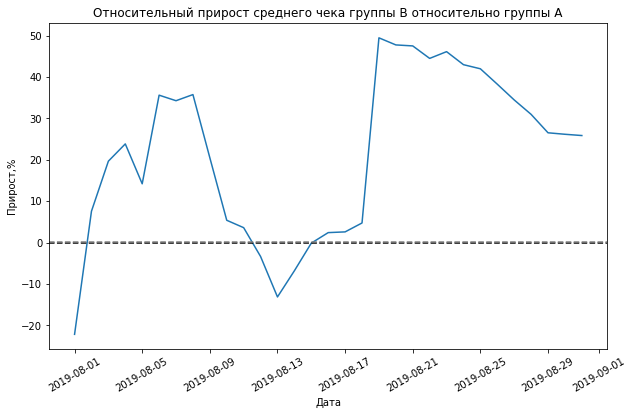

In [9]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeRevenue['date'], 
         ((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)*100.0)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.26, color='grey', linestyle='--');
plt.xlabel('Дата')
plt.ylabel('Прирост,%') 
plt.title('Относительный прирост среднего чека группы B относительно группы A')
plt.xticks(rotation=30);

Относительное изменение кумулятивного среднего чека группы В к группе А резко скачет устонавливается на 26% под конец теста. Скачок 18го дня ярко выделяется и на этом графике.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

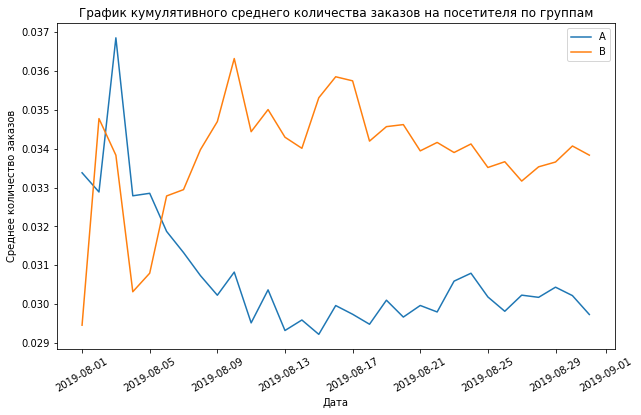

In [10]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.figure(figsize=(10,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов') 
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=30);


На графике видим, что в первые дни конверся у группы А была выше, чем у В, но на 6й день это поменялось:
После этого группа B стабильно показывает большую конверсию чем группа A

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

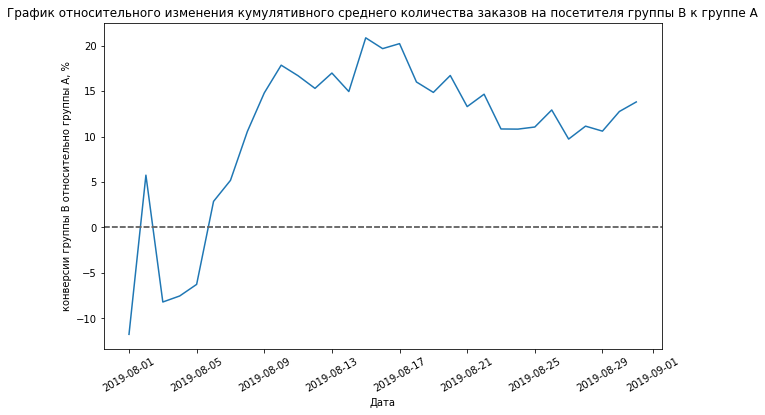

In [11]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeConversions['date'], (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)*100.0)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.09, color='grey', linestyle='--');
plt.xlabel('Дата')
plt.ylabel('конверсии группы B относительно группы A, %')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=30);

Конверсия в группе B стабильно лучше конверсии в группе A на 9% по просшествии 7ми дней после начала тестирования

### Построим точечный график количества заказов по пользователям

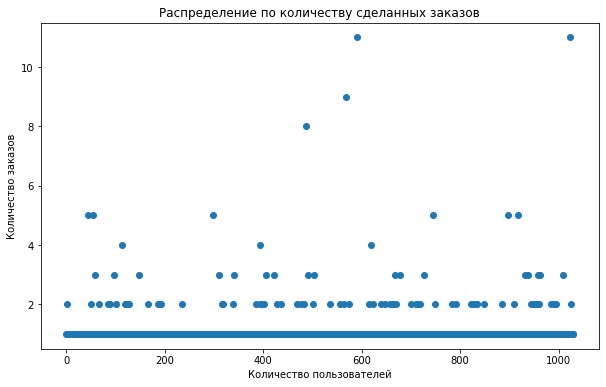

In [12]:
orders.head(5)
ordersByUsers = orders.groupby('visitor_id', as_index = False).agg({'transaction_id':'count'})
ordersByUsers.columns = ['visitor_id', 'orders']
plt.figure(figsize=(10,6))
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']);
plt.ylabel('Количество заказов')
plt.title('Распределение по количеству сделанных заказов');
plt.xlabel('Количество пользователей');

Больше всего пользователей с 1м или 2мя заказами, остальные редки,максимально активные пользователи делают до 11ти заказов за месяц. Они будут в дальнейшем убраны

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [13]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Больше 2 заказов совершают только 5% пользователей, все пользователи сделавшие больше заказов, далее рассматриваются как аномальные.

### Построим точечный график стоимостей заказов.

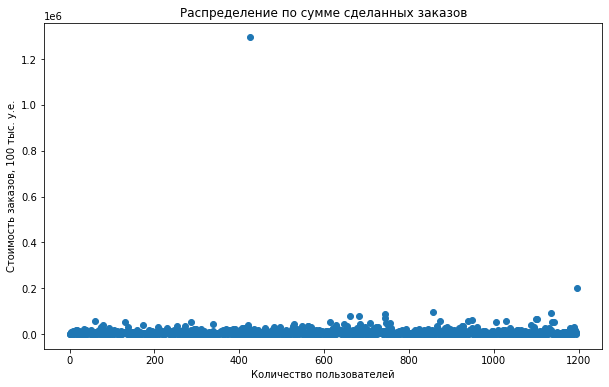

In [14]:
plt.figure(figsize=(10,6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.ylabel('Стоимость заказов, 100 тыс. у.е.') 
plt.xlabel('Количество пользователей') 
plt.title('Распределение по сумме сделанных заказов');

Отчетливо виден закз на сумму свыше 120 000, остальные заказы не превышают 20 000, возможно именно с этой аномалией связан резкий скачок на предыдущих графиках 

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [15]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Заказы на сумму свыше 28 000 совершают только 5% пользователей, все пользователи сделавшие заказы на большую сумму, далее рассматриваются как аномальные.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
Сформулируем гипотезы:

H0:различий в среднем количестве заказов между группами нет. 

H1: различия в среднем между группами есть.

In [16]:
#задаем значение aplha
alpha=.05
#ordersByUsersA пользователи, которые заказывали хотя бы 1 раз,число совершённых ими заказов(группа А)
ordersByUsersA=(orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersA.columns = ['user_id', 'orders']
#ordersByUsersA пользователи, которые заказывали хотя бы 1 раз,число совершённых ими заказов(группа В)
ordersByUsersB =(orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB.columns = ['user_id', 'orders'] 

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]



# выборкa, где каждый элемент — число заказов определённого пользователя, в том числе ноль.
# К ordersByUsersA присоединяем series с нулями длинной (количество пользователей, сумма всех элементов — количество заказов)
sampleA = pd.concat([ordersByUsersA['orders'],
        pd.Series(0,index=np.arange(visitorsADaily['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)

sampleB = pd.concat([ordersByUsersB['orders'],
        pd.Series(0,index=np.arange(visitorsBDaily['visitors'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)
#Применим статистический критерий Манна-Уитни к полученным выборкам:
result_1=stats.mannwhitneyu(sampleA, sampleB)[1]          
print('P-value:{0:.3f}'.format(result_1))
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))  
print('Отношение конверсии В к А: {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))   


P-value:0.017
Отвергаем нулевую гипотезу
Средняя конверсия группы А: 3.0%
Средняя конверсия группы B: 3.4%
Отношение конверсии В к А: 0.138


P-value меньше заданного значения alpha - отвергаем нулевую гипотезу, следовательно верно что различия между конверсиями групп имеют место быть.

Отношений конверсий группы В к А 0.138, что можно интерпритировать как относительный прирост в ~13%, что является не плохим результатом, на следующих этапах посмотрим какое значения будут иметь данные без аномалий

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
Сформулируем гипотезы:

Н0: Различий в средних чеках между группами нет

Н1: Различия в средних чеках между группами есть

In [17]:
sampleA=orders[orders['group']=='A']['revenue']
sampleB=orders[orders['group']=='B']['revenue']
result_2=stats.mannwhitneyu(sampleA, sampleB)[1]
print('P-value:{0:.3f}'.format(result_2))
if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Средняя чек группы А: {:.5}'.format(sampleA.mean()))
print('Средняя чек группы B: {:.5}'.format(sampleB.mean()))  
print('Отношение среднего чека В к А: {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))  


P-value:0.729
Не получилось отвергнуть нулевую гипотезу
Средняя чек группы А: 7333.6
Средняя чек группы B: 9230.9
Отношение среднего чека В к А: 0.259


P-value больше заданного значения alpha - не можем отвергнуть нулевую гипотезу, с нет оснований считать группы разными.

Отношений конверсий группы В к А 0.256, что можно интерпритировать как относительный прирост в ~26%,различие не является значимым для этих групп

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

In [18]:
#Сделаем срез пользователей с числом заказов больше 2
usersWithManyOrders=pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
    ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],],axis=0,)
#Сделаем срез пользователей, совершивших заказы дороже 28 000
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
#Объединим пользователей в переменной abnormalUsers
abnormalUsers = (pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders,filt], axis=0)
    .drop_duplicates()
    .sort_values())
print('Колличество аномальных пользователей',abnormalUsers.shape[0]) 


Колличество аномальных пользователей 113


In [19]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],
     pd.Series(0,index=np.arange(visitorsADaily['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],
    pd.Series(0,index=np.arange(visitorsBDaily['visitors'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0) 
#Применим статистический критерий Манна-Уитни к полученным выборкам:
result_3=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]          
print('P-value:{0:.3f}'.format(result_3))
if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Средняя конверсия группы А: {:.1%}'.format(sampleAFiltered.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleBFiltered.mean()))  
print('Отношение конверсии В к А: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))   


P-value:0.009
Отвергаем нулевую гипотезу
Средняя конверсия группы А: 2.3%
Средняя конверсия группы B: 2.7%
Отношение конверсии В к А: 0.189


P-value меньше заданного значения alpha - так же отвергаем нулевую гипотезу, следовательно верно что различия между конверсиями групп имеют место быть.

Аномалии особо не повлияли на статистическую значимость. По очищенным данным p_value уменьшился с 1.7%% до 0.9%.
Отношений конверсий группы В к А увеличилось до 0.189 на 5.1%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [20]:
sampleAFiltered=orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']
sampleBFiltered=orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']

result_4=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]     
print('P-value:{0:.3f}'.format(result_4))
if result_4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")  
print('Средняя чек группы А: {:.5}'.format(sampleAFiltered.mean()))
print('Средняя чек группы B: {:.5}'.format(sampleBFiltered.mean()))  
print('Отношение среднего чека В к А: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))  


P-value:0.762
Не получилось отвергнуть нулевую гипотезу
Средняя чек группы А: 5102.5
Средняя чек группы B: 4988.0
Отношение среднего чека В к А: -0.022


На очищенных данных статистическая значимость средних чеков группы B и A, также равны, их абсолютные значения практически выровнились.

# Примем решение по результатам теста

Был проведен тест на корректность предоставленных данных (A/A тест)
Выборка данных имеет корректный размер, проблему подглядывания в результате сравнения групп во время проведения теста мы исключаем. Было обнаружено 58 пользователей с некорректным разделением по группам

Из графиков кумулятивного расчета выявлено:
 - Прибыль в обеих группах почти равномерно растет в течение всего рассматриваемого периода
 - Кумулятивный средний чек рос неравномерно
 - График кумулятивного среднего количества заказов на посетителя по группам показателен. По группе А падает с выходом на плато, но на всем периоде больше стабильно растущей метрики по группе В. ошибку при А/А тестировании
 
Оценили наличие аномалий в данных.

Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» и "сырым" данным:
  - Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
  
То есть разница получена не случайным образом, а действительно присутствует.
  
Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» и "сырым" данным:
  - По сырым данным нет статистически значимого различия по среднему чеку между группами. после удаления аномалий статистически значимого различия не наблюдается.
  
Следовательно в группе В, количество заказов на посетителя увеличилось, а средний чек остался прежним. Это приведет к росту выручки кампании.Тест следует остановить и признать успешным.